# Title: Heart Failure Prediction

# Project Brief:

**Introduction:**
    Cardiovascular diseases (CVDs) remain a leading cause of global mortality, responsible for approximately 31% of all deaths worldwide. Among CVDs, heart failure is a prevalent condition, contributing significantly to premature deaths. Early detection and management of cardiovascular diseases are crucial for individuals at risk. This project aims to leverage machine learning models to predict heart failure based on relevant patient features.

**Problem Statement:**
    Develop a classification filter using various machine learning models to predict heart failure. The dataset comprises 12 features, including patient demographics, medical history, and diagnostic indicators. The goal is to build a robust model capable of accurately classifying individuals into two categories: those with heart disease (output class 1) and those without (output class 0). Additionally, the project aims to compare the performances of different classification models to identify the most effective approach.


# Project Objective
The primary objective of the project is to create a classification filter for heart failure prediction. This involves implementing and evaluating various classification models on the provided dataset. The comparison of model performances will help identify the most effective model for accurate and reliable predictions.


# Deliverables of the project: 

I.	Project Documentation:

    •	Detailed project overview, objectives, and significance.
    •	Description of dataset attributes and their relevance to heart failure prediction.
    •	Explanation of the chosen machine learning models and their rationale.
    •	Overview of the evaluation metrics used to assess model performance.

II.	Data Preprocessing:

    •	Cleaning and handling missing data.
    •	Encoding categorical variables.
    •	Normalizing or scaling numerical features.

III.	Exploratory Data Analysis (EDA):

    •	Visualization of data distribution and correlations.
    •	Identification of patterns or trends within the dataset.

IV.	Model Development:

    •	Implementation of classification models (e.g., Logistic Regression, Decision Trees, Support Vector Machines, KNN, etc.).
    •	Hyperparameter tuning for optimal model performance.

V.	Model Evaluation:

    •	Comparison of model performances using metrics such as accuracy, precision, recall, F1 score.
    •	Visual representation of model evaluation results.

VI.	Conclusion and Recommendations:

    •	Summary of findings.
    •	Identification of the most effective model for heart failure prediction.
    •	Recommendations for further improvement or refinement.

By delivering these components, the project aims to provide a comprehensive understanding of heart failure prediction using machine learning, along with actionable insights for healthcare practitioners and researchers.


# Resources

**Data set source:**

    Data is provided in .csv format for this project.

Also, similar data can be found in: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

**Software:**

     Anacoda, Jupyter notebook

**Individual Details:**

    Name : Kumar Janardan Waghulde

    Email : kumarwaghulde83@gmail.com
    
    Mobile : 8369455914


# Problem Defination

Develop a machine learning classification model to predict heart failure based on patient attributes, aiming to assist in early detection and management of cardiovascular diseases. Evaluate and compare the performance of different classification models for effective implementation in healthcare.

# Understanding the business problem

Addressing the global health challenge of cardiovascular diseases, this project seeks to harness machine learning to predict heart failure, facilitating timely intervention for individuals at risk. The focus is on enhancing healthcare outcomes through early detection and informed decision-making.

## Step1 : Importing Python Libraries

In [1]:
#Pandas and Numpy have been used for Data Manipulation and numerical Calculations
import pandas as pd
import numpy as np
#Matplotlib and Seaborn have been used for Data visualizations.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# set the display format for floating-point numbers when they are printed or displayed in the console.
pd.options.display.float_format = '{:.2f}'.format
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


## User Defined functions

In [2]:
# UDF for determining the number and % of missing values
def missing (df):
    missing_numbers = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_numbers,missing_percent], axis=1, keys=['Missing_number','missing_percent'])
    return missing_values

## Step 2: Reading the data

In [3]:
df = pd.read_csv("heart_failure_clinical_records1.csv")

In [4]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.20,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.40,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.20,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.00,Flat,1


## Step 3: Dataset Information

In [5]:
# display the number of observations(rows) and features(columns) in the dataset
df_info = df.shape
print(f"There are total {df_info[0]} observations(rows) and {df_info[1]} features(columns) in the dataset")

There are total 918 observations(rows) and 12 features(columns) in the dataset


## Step 4: EDA - Exploratory Data Analysis and Data Visualization

In [6]:
df.head() # to display top 5 observations in the dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


In [7]:
df.tail() # to display last 5 observations in the dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.20,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.40,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.20,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.00,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.00,Up,0


In [8]:
# Randomly select 10 rows from the DataFrame 
# This can be useful for quickly inspecting a small subset of data from a larger DataFrame.
# By using random sampling, we can get a sense of the overall structure and characteristics of the data without having to look at the entire dataset.
# This can be particularly useful for data exploration and initial analysis.
df.sample(n=10) 

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
40,54,F,ATA,150,230,0,Normal,130,N,0.00,Up,0
762,40,M,ASY,110,167,0,LVH,114,Y,2.00,Flat,1
30,53,M,NAP,145,518,0,Normal,130,N,0.00,Flat,1
209,54,M,ASY,125,216,0,Normal,140,N,0.00,Flat,1
154,41,M,ATA,120,291,0,ST,160,N,0.00,Up,0
431,62,M,ASY,120,220,0,ST,86,N,0.00,Up,0
490,72,M,NAP,120,214,0,Normal,102,Y,1.00,Flat,1
557,56,M,NAP,137,208,1,ST,122,Y,1.80,Flat,1
192,48,M,ATA,130,245,0,Normal,160,N,0.00,Up,0
893,57,M,ATA,154,232,0,LVH,164,N,0.00,Up,1


In [9]:
# Analyzing Missing Values
missing(df)

,Missing_number,missing_percent
Age,0,0.00
Sex,0,0.00
ChestPainType,0,0.00
RestingBP,0,0.00
Cholesterol,0,0.00
FastingBS,0,0.00
RestingECG,0,0.00
MaxHR,0,0.00
ExerciseAngina,0,0.00
Oldpeak,0,0.00


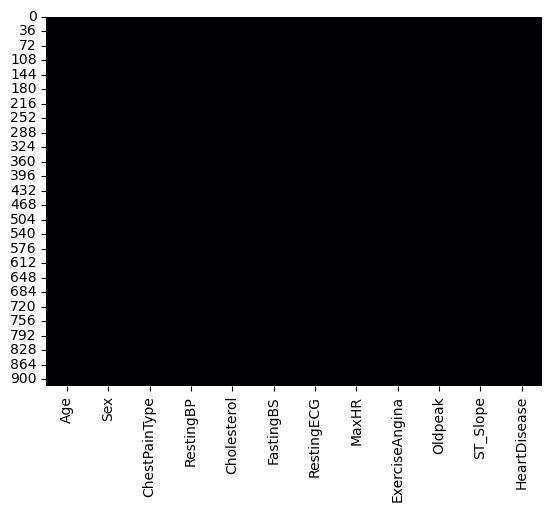

In [10]:
# observing null values through visualization
sns.heatmap(df.isnull(), cmap ='magma',cbar=False);

   **No null values** present in the data!

Cholesterol levels of 0 are extremely unlikely and usually indicate missing or erroneous data rather than an actual physiological value. In a healthy individual, cholesterol is an essential component of cell membranes and a precursor to several important molecules in the body, such as hormones and bile acids.

Normal cholesterol levels typically range from around 125 to 200 milligrams per deciliter (mg/dL) of blood. While it's theoretically possible for cholesterol levels to be extremely low due to certain medical conditions or extreme dietary factors, a value of 0 would generally be considered abnormal and likely a data entry error or missing data.

Similarly Resting BP also can not be 0 as 0 would suggest either a complete cessation of blood flow or a lack of cardiac activity, both of which are incompatible with life.

In [11]:
df.describe().T   # provide summary statistics for numeric columns in the dataframe

,count,mean,std,min,25%,50%,75%,max
Age,918.00,53.51,9.43,28.00,47.00,54.00,60.00,77.00
RestingBP,918.00,132.40,18.51,0.00,120.00,130.00,140.00,200.00
Cholesterol,918.00,198.80,109.38,0.00,173.25,223.00,267.00,603.00
FastingBS,918.00,0.23,0.42,0.00,0.00,0.00,0.00,1.00
MaxHR,918.00,136.81,25.46,60.00,120.00,138.00,156.00,202.00
Oldpeak,918.00,0.89,1.07,-2.60,0.00,0.60,1.50,6.20
HeartDisease,918.00,0.55,0.50,0.00,0.00,1.00,1.00,1.00


## Analysis & inference of above data

1. **Age:**
   - **Insight:** The average age in our dataset is about 53 years, with people ranging from 28 to 77 years.
   - **Implication:** Most individuals in our data are in their late 40s to early 60s.
   

2. **Resting Blood Pressure (RestingBP):**
   - **Insight:** On average, the resting blood pressure is around 132 mm Hg.
   - **Implication:** There's a bit of variation, but it's generally within a healthy range.
   

3. **Cholesterol:**
   - **Insight:** The average cholesterol level is approximately 199 mg/dL.
   - **Implication:** Cholesterol levels vary, and we should check for any data issues as the minimum value is 0.
   

4. **Fasting Blood Sugar (FastingBS):**
   - **Insight:** Most people (about 77%) have low fasting blood sugar (0).
   - **Implication:** The majority of individuals in our dataset seem to have normal fasting blood sugar levels.
   

5. **Maximum Heart Rate (MaxHR):**
   - **Insight:** On average, the maximum heart rate is around 137 beats per minute.
   - **Implication:** Maximum heart rates vary, but the majority fall between 120 and 156 beats per minute.
   

6. **Oldpeak:**
   - **Insight:** The average oldpeak value is 0.89.
   - **Implication:** Oldpeak represents exercise-induced heart stress; we need to understand this better to draw conclusions.
   

7. **Heart Disease (HeartDisease):**
   - **Insight:** About 55% of individuals in the dataset have heart disease.
   - **Implication:** Heart disease seems somewhat prevalent in our dataset.


**Key Takeaway:**
- We have a diverse group of individuals, primarily in their middle to late adulthood.
- Blood pressure and cholesterol levels are generally within expected ranges, but some data issues may need attention.
- Fasting blood sugar levels are mostly normal.
- The dataset includes information about exercise-induced stress (oldpeak), which requires further understanding.
- Heart disease is present in over half of the individuals, indicating a significant consideration for further analysis.
    

In [12]:
df.describe(include=object).T # provide summary statistics for categorical columns in dataset

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


## Analysis and Inference of above data

1. **Sex:**
   - **Insight:** There are 918 entries, and it's binary (2 unique values: M and F).
   - **Indication:** The dataset primarily consists of male (M) individuals (about 79% of the data).

2. **Chest Pain Type:**
   - **Insight:** There are 918 entries, and it has 4 unique values.
   - **Indication:** The most common chest pain type is ASY (asymptomatic), occurring 496 times.

3. **Resting ECG (Electrocardiographic Results):**
   - **Insight:** There are 918 entries, and it has 3 unique values.
   - **Indication:** A majority of individuals (about 60%) have a Normal resting ECG result (552 occurrences).

4. **Exercise-Induced Angina:**
   - **Insight:** There are 918 entries, and it's binary (2 unique values: Y and N).
   - **Indication:** Most individuals (about 60%) do not experience exercise-induced angina (N, 547 occurrences).

5. **ST Segment Slope:**
   - **Insight:** There are 918 entries, and it has 3 unique values.
   - **Indication:** The most common ST segment slope is Flat, occurring 460 times.

**Key Takeaway:**
- The dataset has a predominantly male representation.
- ASY (asymptomatic) is the most frequently reported chest pain type.
- A significant portion of individuals has a normal resting ECG result.
- The majority do not experience exercise-induced angina.
- Flat is the most common ST segment slope.

### Visualization

4.1 Target

1    508
0    410
Name: HeartDisease, dtype: int64

There are total 410 Person Having No Heart Disease and 508 Person Having Heart Disease


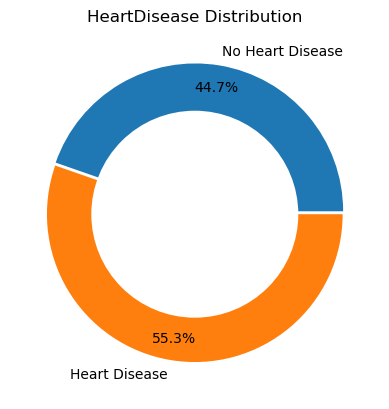

In [13]:
# checking the distribution of target variable i.e HeartDisease
print(df['HeartDisease'].value_counts())
df_HeartDisease_Info = df['HeartDisease'].value_counts()
print(f"\nThere are total {df_HeartDisease_Info[0]} Person Having No Heart Disease and {df_HeartDisease_Info[1]} Person Having Heart Disease")

# Map targets to meaningful statements
classes = {
    'No Heart Disease': 0,
    'Heart Disease': 1
}
# Find the number of patients with/without heart disease
class_pop = [len(df[df['HeartDisease'] == _class]) for _class in classes.values()]

# Drawing a donut chart
plt.title('HeartDisease Distribution')
plt.pie(
    x=class_pop,
    labels=classes.keys(),
    autopct='%.1f%%',
    explode=[0.02, 0],
    pctdistance=0.85
)
center_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.savefig('Class Population.jpg', dpi=300)
plt.show()

The above diagram shows that dataset is quite balanced

### Plotting Histogram for Entire DataSet

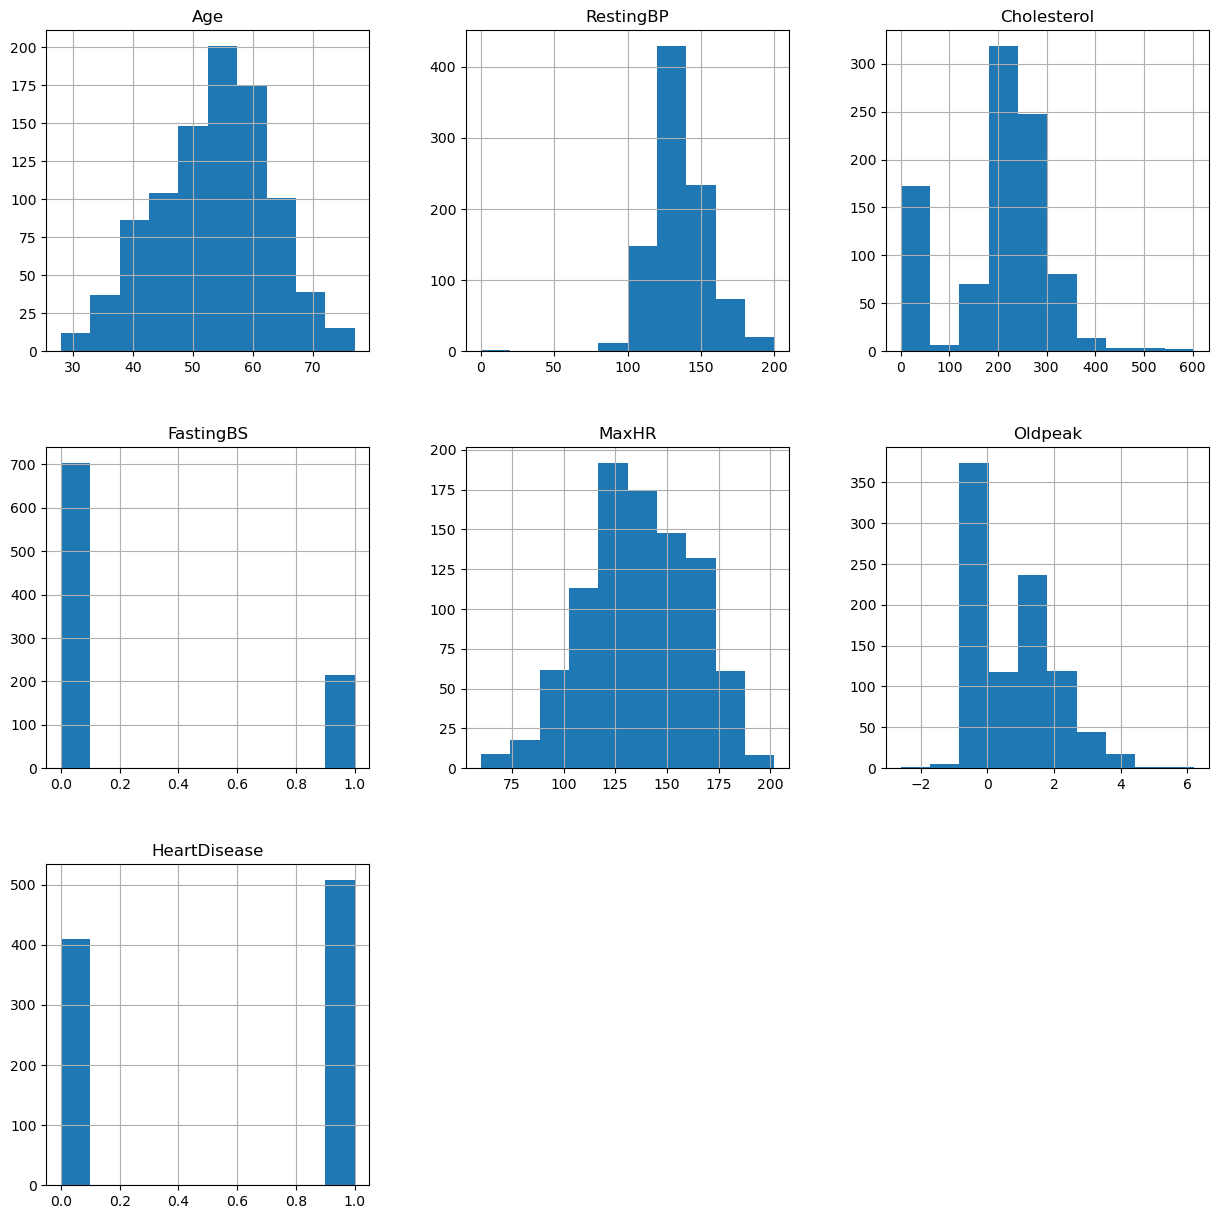

In [14]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
g = df.hist(ax=ax)

### Get correlation of all the features of the dataset

<Axes: >

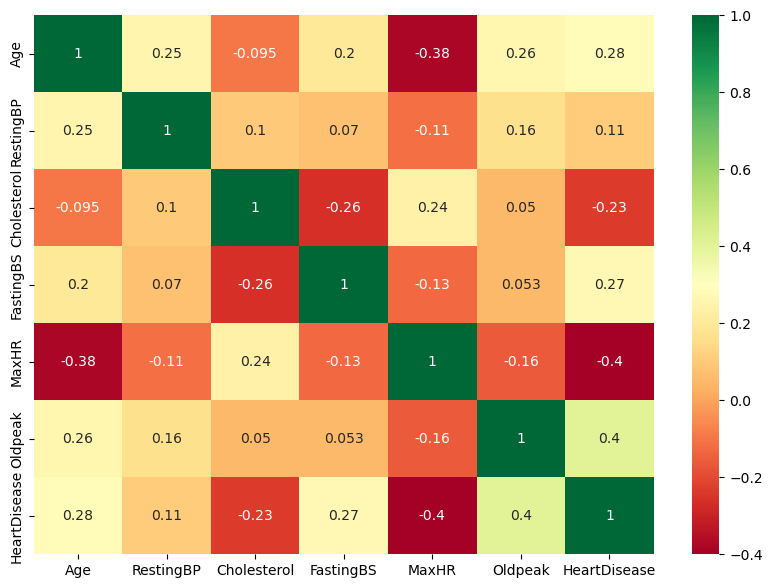

In [15]:
# Selecting correlated features using Heatmap
corr_matrix = df.corr()
top_corr_features = corr_matrix.index

# Plotting the heatmap
plt.figure(figsize=(10,7))
sns.heatmap(data=df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [16]:
df_temp = df.corr()

count = "Done"
feature =[]
collinear=[]
for col in df_temp.columns:
    for i in df_temp.index:
        if (df_temp[col][i]> .9 and df_temp[col][i] < 1) or (df_temp[col][i]< -.9 and df_temp[col][i] > -1) :
                feature.append(col)
                collinear.append(i)
                print(Fore.RED + f"\033[1mmulticolinearity alert in between\033[0m {col} - {i}")
        else:
            print(f"For {col} and {i}, there is NO multicollinearity problem") 

print("\033[1mThe number of strong corelated features:\033[0m", count) 

For Age and Age, there is NO multicollinearity problem
For Age and RestingBP, there is NO multicollinearity problem
For Age and Cholesterol, there is NO multicollinearity problem
For Age and FastingBS, there is NO multicollinearity problem
For Age and MaxHR, there is NO multicollinearity problem
For Age and Oldpeak, there is NO multicollinearity problem
For Age and HeartDisease, there is NO multicollinearity problem
For RestingBP and Age, there is NO multicollinearity problem
For RestingBP and RestingBP, there is NO multicollinearity problem
For RestingBP and Cholesterol, there is NO multicollinearity problem
For RestingBP and FastingBS, there is NO multicollinearity problem
For RestingBP and MaxHR, there is NO multicollinearity problem
For RestingBP and Oldpeak, there is NO multicollinearity problem
For RestingBP and HeartDisease, there is NO multicollinearity problem
For Cholesterol and Age, there is NO multicollinearity problem
For Cholesterol and RestingBP, there is NO multicolline

### Analyzing Target Variable

In [17]:
df["HeartDisease"].describe()

count   918.00
mean      0.55
std       0.50
min       0.00
25%       0.00
50%       1.00
75%       1.00
max       1.00
Name: HeartDisease, dtype: float64

In [18]:
df["HeartDisease"].unique()

array([0, 1], dtype=int64)

### Co-relation between columns

In [19]:
print(df.corr()["HeartDisease"].abs().sort_values(ascending=False))

HeartDisease   1.00
Oldpeak        0.40
MaxHR          0.40
Age            0.28
FastingBS      0.27
Cholesterol    0.23
RestingBP      0.11
Name: HeartDisease, dtype: float64


### Analyzing the Features

4.2 Age

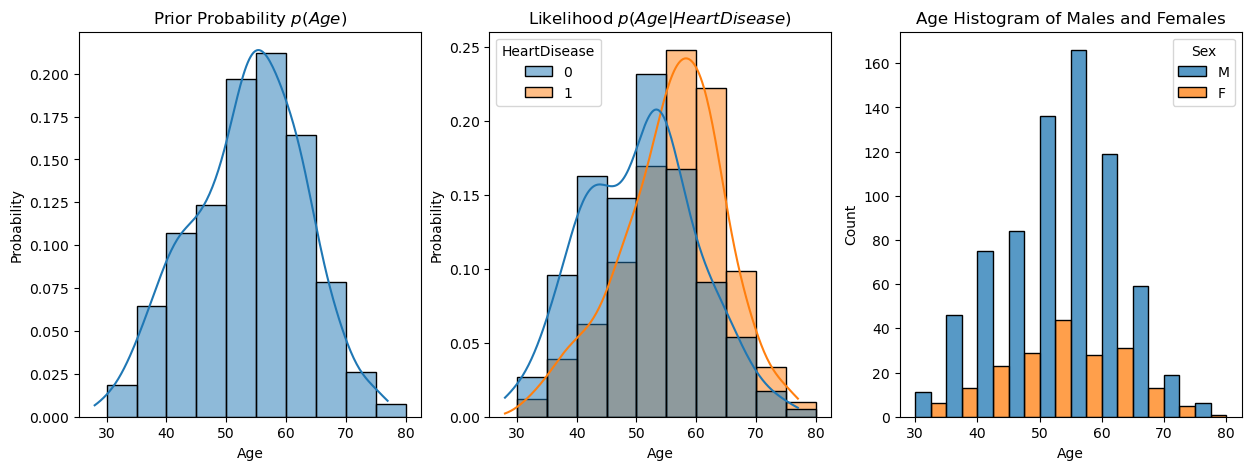

In [20]:
# Visualize to figure out the distribution of age  and risk of heart disease in veries ages.
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Prior Probability $p(Age)$')
sns.histplot(
    data=df, x='Age',
    kde=True,
    binwidth=5, binrange=(30, df['Age'].max()),
    stat='probability', common_norm=False,
    ax=axes[0]
)
plt.subplot(1, 3, 2)
plt.title(r'Likelihood $p(Age|HeartDisease)$')
sns.histplot(
    data=df, x='Age',
    kde=True,
    binwidth=5, binrange=(30, df['Age'].max()),
    hue='HeartDisease',
    stat='probability', common_norm=False,
    ax=axes[1]
)
plt.subplot(1, 3, 3)
plt.title('Age Histogram of Males and Females')
sns.histplot(
    data=df, x='Age',
    binwidth=5, binrange=(30, df['Age'].max()),
    hue='Sex',
    multiple='dodge',
    ax=axes[2]
)
plt.savefig('Age.jpg', dpi=300)
plt.show()

* Probability Distribution: Normal

* Interpretation:
 
    1. Patients having heart disease are mostly i age group of 55 to 60 years.

4.3 Sex

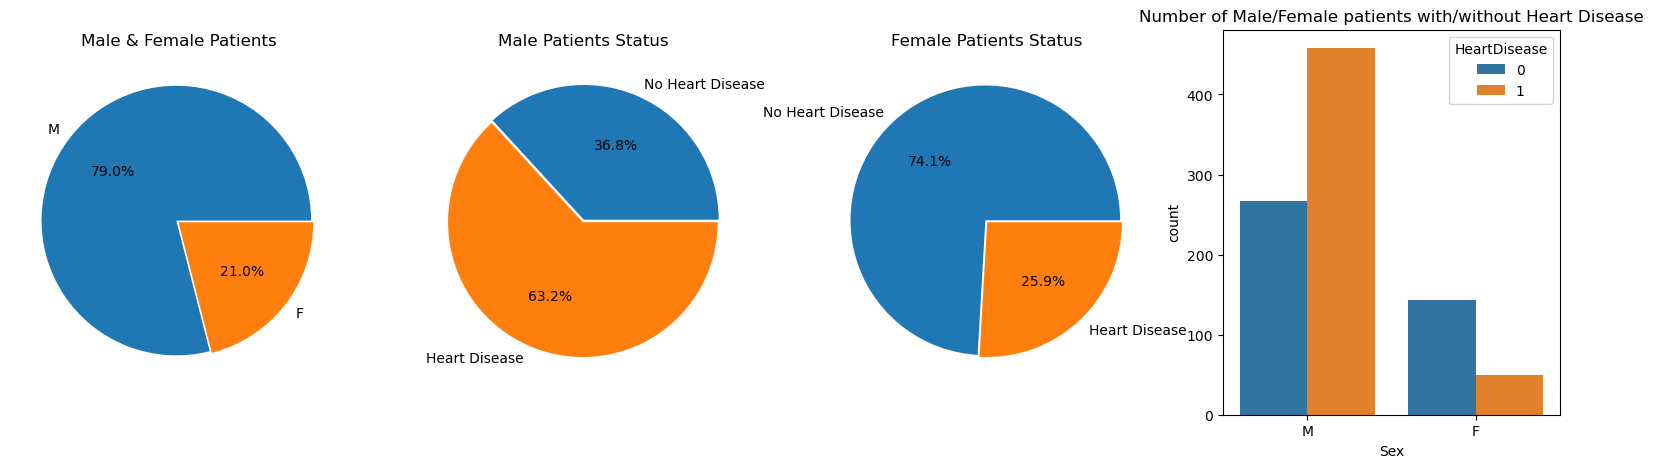

In [21]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
genders = df['Sex'].unique()
gender_pop = [len(df[df['Sex'] == _gender]) for _gender in genders]
plt.subplot(1, 4, 1)
plt.title('Male & Female Patients')
plt.pie(
    x=gender_pop,
    labels=genders,
    autopct='%.1f%%',
    explode=[0.02, 0],
)

# Status of male and female patients
male_stat = [len(df[(df['Sex'] == 'M') & (df['HeartDisease'] == _class)]) for _class in classes.values()]
female_stat = [len(df[(df['Sex'] == 'F') & (df['HeartDisease'] == _class)]) for _class in classes.values()]

plt.subplot(1, 4, 2)
plt.title('Male Patients Status')
plt.pie(
    x=male_stat,
    labels=classes.keys(),
    autopct='%.1f%%',
    explode=[0.02, 0],
)
plt.subplot(1, 4, 3)
plt.title('Female Patients Status')
plt.pie(
    x=female_stat,
    labels=classes.keys(),
    autopct='%.1f%%',
    explode=[0.02, 0],
)
plt.subplot(1, 4, 4)
plt.title('Number of Male/Female patients with/without Heart Disease')
sns.countplot(
    data=df, x='Sex',
    hue='HeartDisease',
    ax=axes[3]
)

plt.savefig('Sex.jpg', dpi=300)
plt.show()

* Interpretation:

    1. In Dataset majority of Patients are Male

    2. As compare to Male Female Patients are less prone to heart Failures 

4.4 ChestPainType

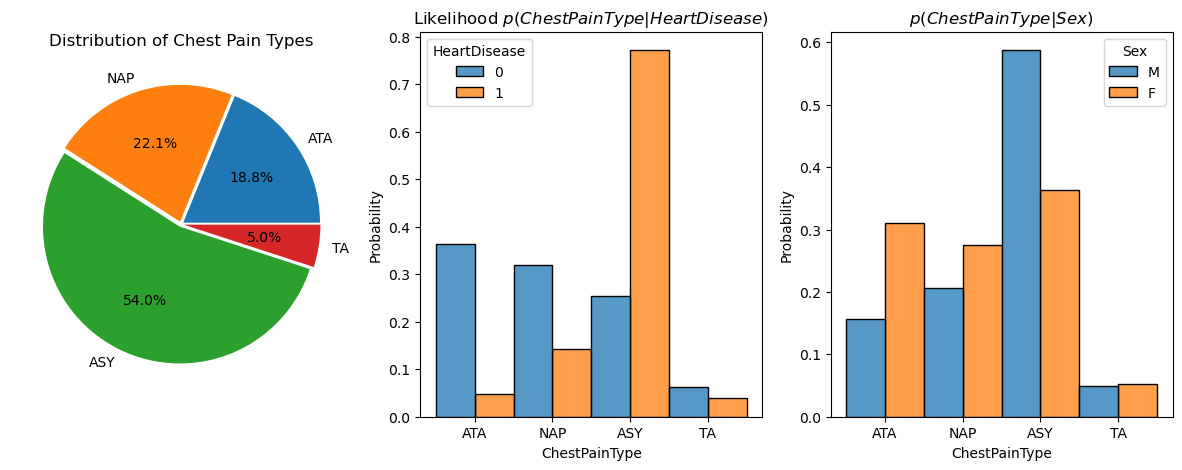

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

pains = df['ChestPainType'].unique()
pains_pop = [len(df[df['ChestPainType'] == _pain]) for _pain in pains]

plt.subplot(1, 3, 1)
plt.title('Distribution of Chest Pain Types')
plt.pie(
    x=pains_pop,
    labels=pains,
    autopct='%.1f%%',
    explode=0.02 * np.ones(len(pains))
)

plt.subplot(1, 3, 2)
plt.title('Likelihood $p(ChestPainType|HeartDisease)$')
sns.histplot(
    data=df, x='ChestPainType',
    hue='HeartDisease',
    stat='probability', common_norm=False,
    multiple='dodge',
    ax=axes[1]
)

plt.subplot(1, 3, 3)
plt.title('$p(ChestPainType|Sex)$')
sns.histplot(
    data=df, x='ChestPainType',
    hue='Sex',
    stat='probability', common_norm=False,
    multiple='dodge',
    ax=axes[2]
)

plt.savefig('Chest Pain Type.jpg', dpi=300)
plt.show()

* Interpretation:
    
    1. The majority of patients had chest pain of type 'ASY' while only a few had 'TA'. 
    
    2. Since the dataset is balanced with respect to heart disease, we can interpret that if a patient has chest pain of type 'ASY', it is probable that he/she has heart disease.

4.5 RestingBP

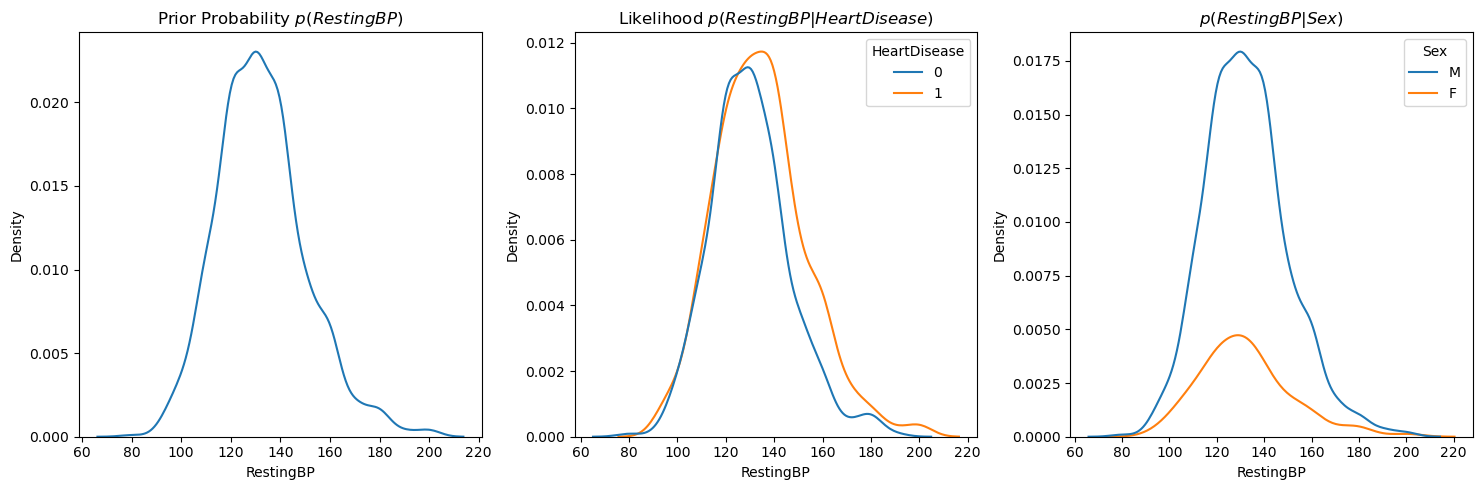

In [23]:
## RestingBP is not recorded for one patient. Since one data record would not cause much difference, we can remove that.
df = df.drop(df.index[df['RestingBP'] == 0], axis=0, inplace=False)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Prior Probability $p(RestingBP)$')
sns.kdeplot(
    data=df, x='RestingBP',
    ax=axes[0]
)

plt.subplot(1, 3, 2)
plt.title('Likelihood $p(RestingBP|HeartDisease)$')
sns.kdeplot(
    data=df, x='RestingBP',
    hue='HeartDisease',
    ax=axes[1]
)

plt.subplot(1, 3, 3)
plt.title('$p(RestingBP|Sex)$')
sns.kdeplot(
    data=df, x='RestingBP',
    hue='Sex',
    ax=axes[2]
)

plt.tight_layout()
plt.savefig('RestingBP.jpg', dpi=300)
plt.show()


4.6 Cholesterol

In [24]:
# Cholesterol is not recorded for some patients. Find the number of patients whose cholesterol is not recorded to decide whether to remove records with missing values or not
n_patients = len(df[df['Cholesterol'] == 0])
print(f'Patients for whom cholesterol is not recorded: {n_patients}{os.linesep}Equivalent to {100 * n_patients / len(df):.2f}% of the dataset')

Patients for whom cholesterol is not recorded: 171
Equivalent to 18.65% of the dataset


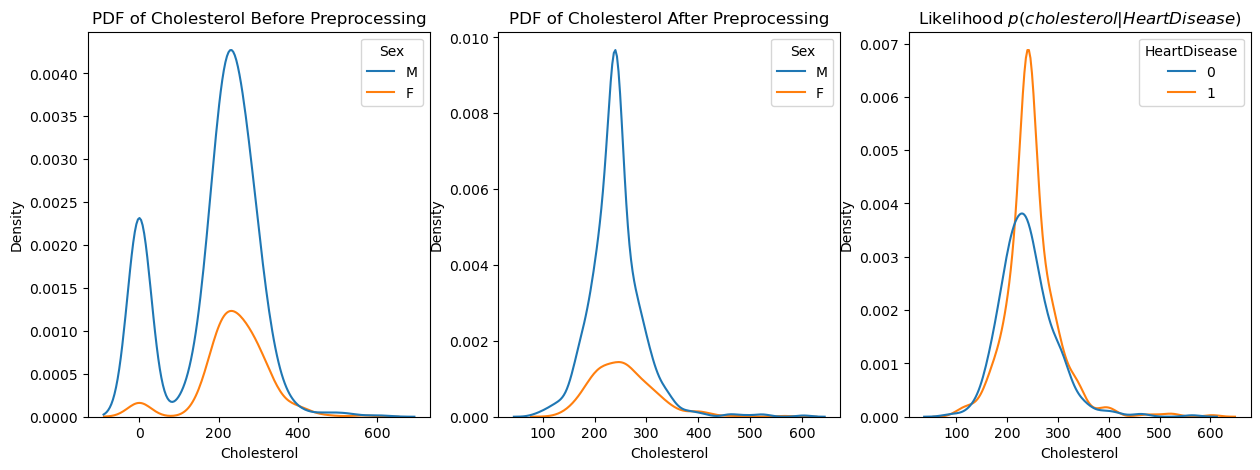

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('PDF of Cholesterol Before Preprocessing')
sns.kdeplot(
    data=df, x='Cholesterol',
    hue='Sex',
    ax=axes[0]
)

# Fill cholesterol for patients whose cholesterol is not recorded -> strategy: mean
# Calculate the mean cholesterol for male and female separately and replace with 0s in the data
df_filled = df.copy()

df_filled.loc[(df['Cholesterol'] == 0) & (df['Sex'] == 'M') & (df['HeartDisease'] == 0), 'Cholesterol'] = df.loc[
    (df['Cholesterol'] != 0) & (df['Sex'] == 'M'), 'Cholesterol'].mean()

df_filled.loc[(df['Cholesterol'] == 0) & (df['Sex'] == 'M') & (df['HeartDisease'] == 1), 'Cholesterol'] = df.loc[
    (df['Cholesterol'] != 0) & (df['Sex'] == 'M'), 'Cholesterol'].mean()

df_filled.loc[(df['Cholesterol'] == 0) & (df['Sex'] == 'F') & (df['HeartDisease'] == 0), 'Cholesterol'] = df.loc[
    (df['Cholesterol'] != 0) & (df['Sex'] == 'F'), 'Cholesterol'].mean()

df_filled.loc[(df['Cholesterol'] == 0) & (df['Sex'] == 'F') & (df['HeartDisease'] == 1), 'Cholesterol'] = df.loc[
    (df['Cholesterol'] != 0) & (df['Sex'] == 'F'), 'Cholesterol'].mean()

plt.subplot(1, 3, 2)
plt.title('PDF of Cholesterol After Preprocessing')
sns.kdeplot(
    data=df_filled, x='Cholesterol',
    hue='Sex',
    ax=axes[1]
)

plt.subplot(1, 3, 3)
plt.title('Likelihood $p(cholesterol|HeartDisease)$')
sns.kdeplot(
    data=df_filled, x='Cholesterol',
    hue='HeartDisease',
    ax=axes[2]
)

plt.savefig('Cholesterol.jpg', dpi=300)
plt.show()

* Probability Distribution: Normal 

* Interpretation 
    
    1: Male and female patients have quite the same average cholesterol.
    
    2: Patients suffering from heart disease have slightly more average cholesterol

4.7 FastingBS

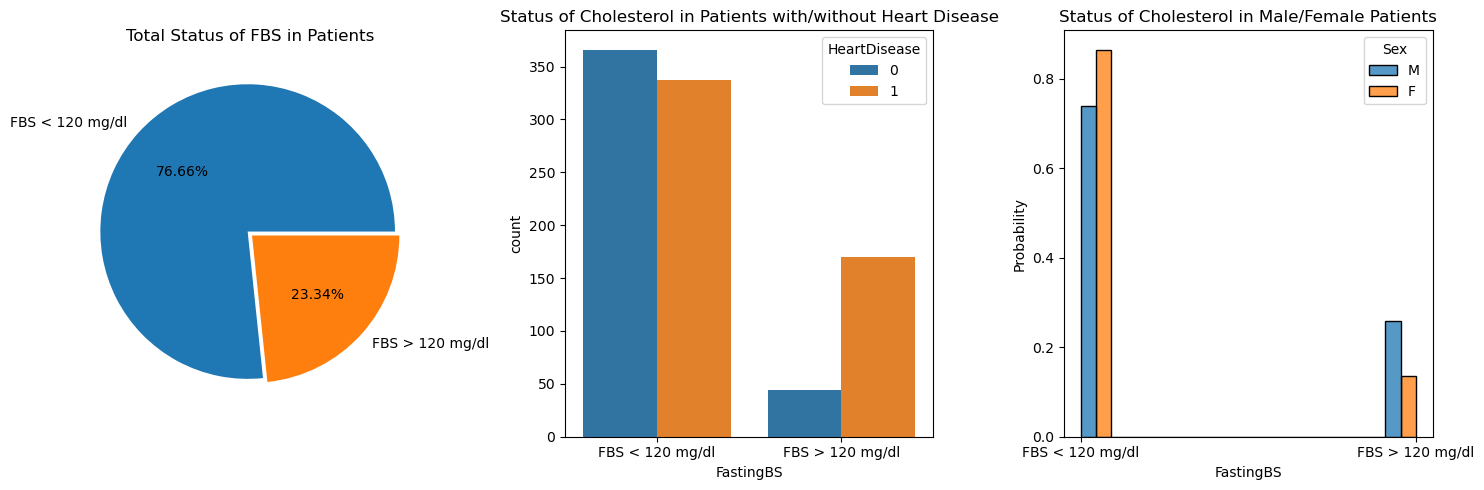

In [26]:
# As mentioned in 'Dataset Specifications' section, this is a categorical feature that has only two possible values. 0 indicates that FBS of patient is less than 120 mg/dl and 1 indicates that FBS is greater than 120 mg/dl
FBS_classes = {
    'FBS < 120 mg/dl': 0,
    'FBS > 120 mg/dl': 1
}

FBS_pop = [len(df_filled[df_filled['FastingBS'] == _fbs]) for _fbs in FBS_classes.values()]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Total Status of FBS in Patients')
plt.pie(
    x=FBS_pop,
    labels=FBS_classes.keys(),
    autopct='%.2f%%',
    explode=0.02 * np.ones(len(FBS_classes))
)

plt.subplot(1, 3, 2)
plt.title('Status of Cholesterol in Patients with/without Heart Disease')
sns.countplot(
    data=df_filled, x='FastingBS',
    hue='HeartDisease',
    ax=axes[1]
)
plt.xticks([0, 1], FBS_classes.keys())

plt.subplot(1, 3, 3)
plt.title('Status of Cholesterol in Male/Female Patients')
sns.histplot(
    data=df_filled, x='FastingBS',
    hue='Sex',
    stat='probability', common_norm=False,
    multiple='dodge',
    ax=axes[2]
)
plt.xticks([0, 1], FBS_classes.keys())

plt.tight_layout()
plt.savefig('FastingBS.jpg', dpi=300)
plt.show()

* Interpretation:

    1. The majority of patients in the dataset have FBS < 120 mg/dl 
    
    2. Patients having heart disease are more likely to have FBS > 120 mg/dl

4.8 RestingECG

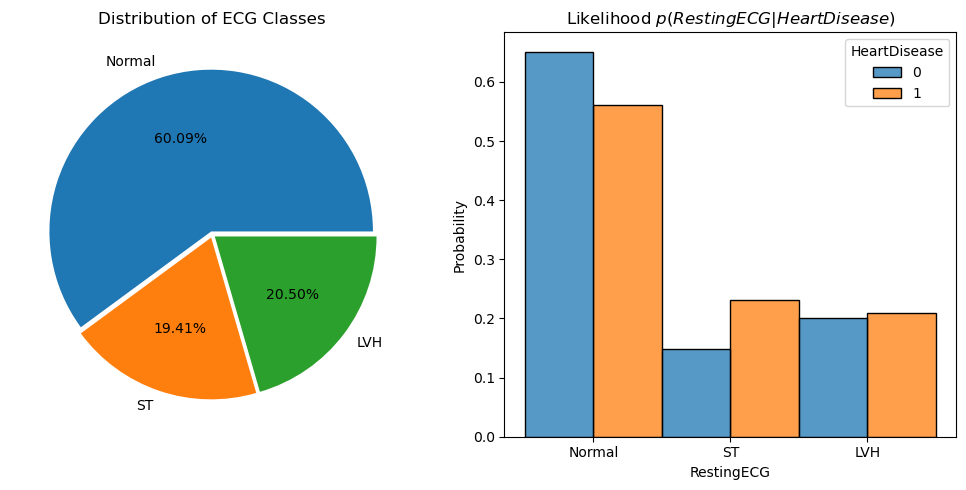

In [27]:
ECG_Classes = ['Normal', 'ST', 'LVH']
ECG_pop = [len(df_filled[df_filled['RestingECG'] == _ecg]) for _ecg in ECG_Classes]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Distribution of ECG Classes')
plt.pie(
    x=ECG_pop,
    labels=ECG_Classes,
    autopct='%.2f%%',
    explode=0.02 * np.ones(len(ECG_Classes))
)

plt.subplot(1, 2, 2)
plt.title('Likelihood $p(RestingECG|HeartDisease)$')
sns.histplot(
    data=df_filled, x='RestingECG',
    hue='HeartDisease',
    stat='probability', common_norm=False,
    multiple='dodge',
    ax=axes[1]
)

plt.tight_layout()
plt.savefig('RestingECG.jpg', dpi=300)
plt.show()

* Interpretation: 

    1. Resting ECG results are normal for 60% of patients in the dataset

4.9 MaxHR

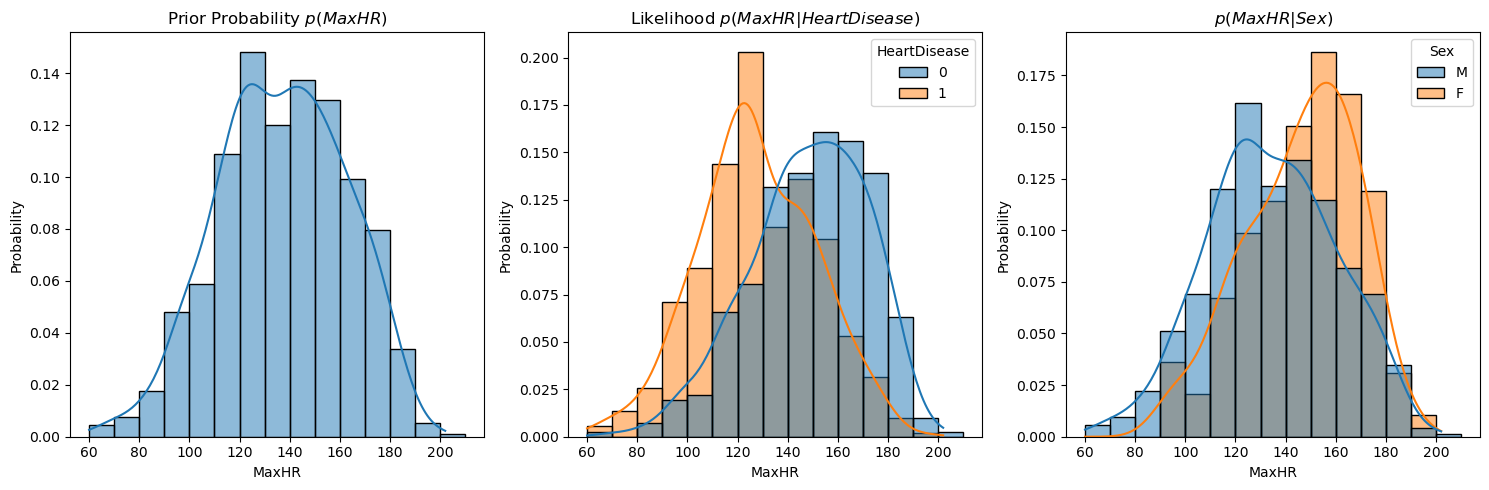

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Prior Probability $p(MaxHR)$')
sns.histplot(
    data=df, x='MaxHR',
    kde=True,
    binwidth=10,
    stat='probability', common_norm=False,
    ax=axes[0]
)

plt.subplot(1, 3, 2)
plt.title('Likelihood $p(MaxHR|HeartDisease)$')
sns.histplot(
    data=df, x='MaxHR',
    kde=True,
    binwidth=10,
    hue='HeartDisease',
    stat='probability', common_norm=False,
    ax=axes[1]
)

plt.subplot(1, 3, 3)
plt.title('$p(MaxHR|Sex)$')
sns.histplot(
    data=df, x='MaxHR',
    kde=True,
    binwidth=10,
    hue='Sex',
    stat='probability', common_norm=False,
    ax=axes[2]
)

plt.tight_layout()
plt.savefig('MaxHR.jpg', dpi=300)
plt.show()

* Probability Distribution: Normal 

* Interpretation: 
    1. Female patients appear to have higher average heart rate than male patients

4.10 ExerciseAngina

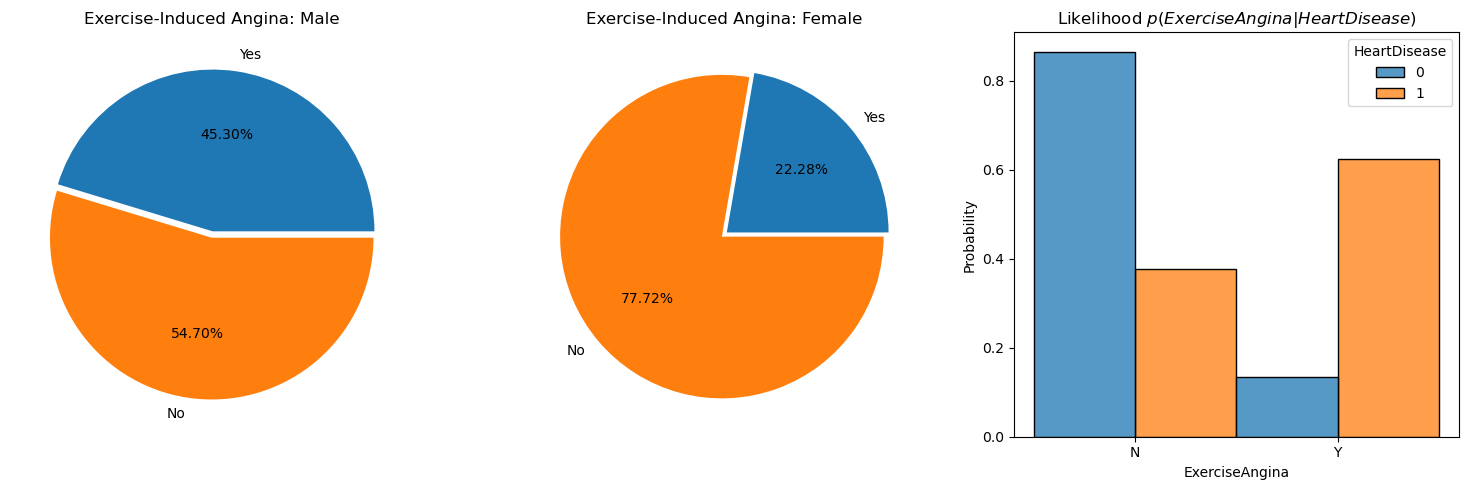

In [29]:
angina_classes = {
    'Yes': 'Y',
    'No': 'N'
}

# Status of ExerciseAngina for male and female patients
m_angina = [len(df_filled[(df_filled['Sex'] == 'M') & (df_filled['ExerciseAngina'] == _angina)]) for _angina in
            angina_classes.values()]
f_angina = [len(df_filled[(df_filled['Sex'] == 'F') & (df_filled['ExerciseAngina'] == _angina)]) for _angina in
            angina_classes.values()]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Exercise-Induced Angina: Male')
plt.pie(
    x=m_angina,
    labels=angina_classes.keys(),
    autopct='%.2f%%',
    explode=0.02 * np.ones(len(angina_classes.keys()))
)

plt.subplot(1, 3, 2)
plt.title('Exercise-Induced Angina: Female')
plt.pie(
    x=f_angina,
    labels=angina_classes.keys(),
    autopct='%.2f%%',
    explode=0.02 * np.ones(len(angina_classes.keys()))
)

plt.subplot(1, 3, 3)
plt.title('Likelihood $p(ExerciseAngina|HeartDisease)$')
sns.histplot(
    data=df_filled, x='ExerciseAngina',
    hue='HeartDisease',
    stat='probability', common_norm=False,
    multiple='dodge',
    ax=axes[2]
)

plt.tight_layout()
plt.savefig('ExerciseAngina.jpg', dpi=300)
plt.show()

* Interpretation:

     1. Female patients seem to have more physical strength than male patients since the mojarity of them do not experience discomfort after physical activities. 
     
     2. According to likelihood function, a patient suffering from heart disease s more probable to experience difficulty and discomfort after exercise or physical activity.

4.11 Oldpeak

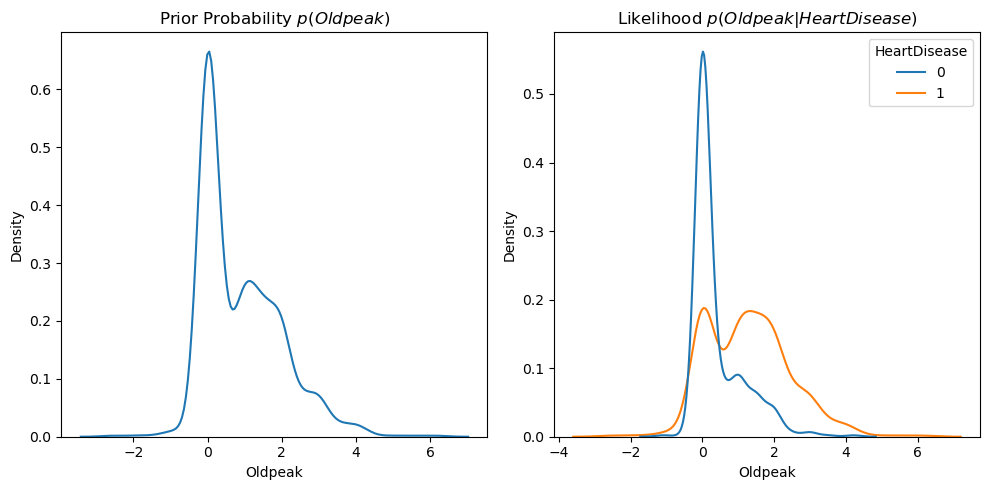

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Prior Probability $p(Oldpeak)$')
sns.kdeplot(
    data=df_filled, x='Oldpeak',
    ax=axes[0]
)

plt.subplot(1, 2, 2)
plt.title('Likelihood $p(Oldpeak|HeartDisease)$')
sns.kdeplot(
    data=df_filled, x='Oldpeak',
    hue='HeartDisease',
    ax=axes[1]
)

plt.tight_layout()
plt.savefig('Oldpeak.jpg', dpi=300)
plt.show()

* Probability Distribution: Malformed Gaussian 

* Interpretation: 
    
    1. Patients suffering from heart disease are more likely to have and old peak that is deviated from 0.

4.12 ST_Slope

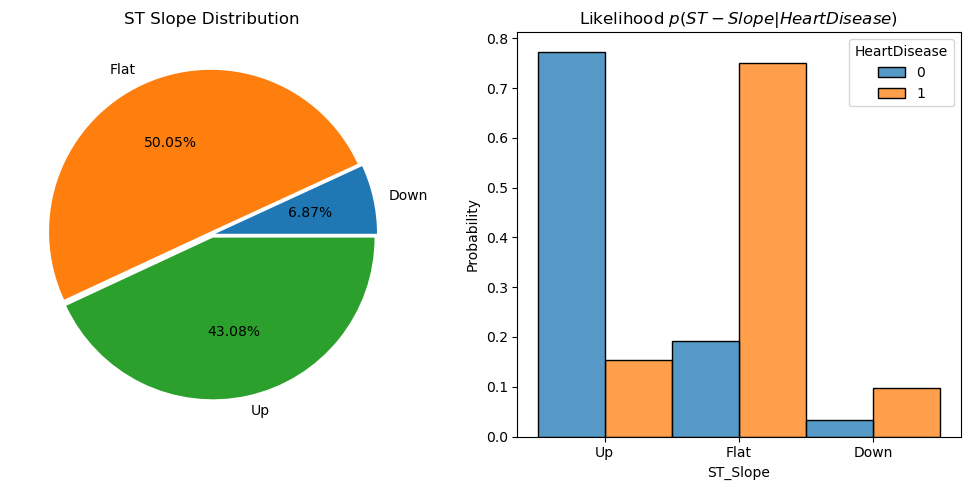

In [31]:
slope_classes = ['Down', 'Flat', 'Up']
slope_pop = [len(df_filled[df_filled['ST_Slope'] == _slope]) for _slope in slope_classes]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('ST Slope Distribution')
plt.pie(
    x=slope_pop,
    labels=slope_classes,
    autopct='%.2f%%',
    explode=0.02 * np.ones(len(slope_classes))
)

plt.subplot(1, 2, 2)
plt.title('Likelihood $p(ST-Slope|HeartDisease)$')
sns.histplot(
    data=df_filled, x='ST_Slope',
    hue='HeartDisease',
    stat='probability', common_norm=False,
    multiple='dodge',
    ax=axes[1]
)

plt.tight_layout()
plt.savefig('ST Slope.jpg', dpi=300)
plt.show()

* Interpretation:

    1. Since we are dealing with a balanced dataset with respect to heart disease, we can say that if ST slope for a patient is flat, there is a high risk of heart failure.

## Step 5: Handling Categorical Features

In [32]:
# In order to convert categorical features to numerical features we use Label-Encoding Approach. So we map each category to an integer.
df_filled['Sex'] = df_filled['Sex'].replace(['M', 'F'], [0, 1])
df_filled['ChestPainType'] = df_filled['ChestPainType'].replace(['ATA', 'NAP', 'ASY', 'TA'], [0, 1, 2, 3])
df_filled['RestingECG'] = df_filled['RestingECG'].replace(['Normal', 'ST', 'LVH'], [0, 1, 2])
df_filled['ExerciseAngina'] = df_filled['ExerciseAngina'].replace(['N', 'Y'], [0, 1])
df_filled['ST_Slope'] = df_filled['ST_Slope'].replace(['Up', 'Flat', 'Down'], [0, 1, 2])

## Step 6:  Splitting Data to Train, Validation and Test Subsets

In [33]:
X = df_filled.drop(['HeartDisease'], axis=1, inplace=False)
y = df_filled['HeartDisease']

# Divide data to train/validation/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

## Step 7:  Feature Scaling & Normalization

In [34]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [35]:
print(X.shape, X_train.shape, X_test.shape)

(917, 11) (641, 11) (138, 11)


## Step 8: Training Classifiers

In [36]:
# Declare a dictionary to save (precision, recall, f1-score) for each classifier
classifiers = {
    'Logistic Regression': (0, 0, 0),
    'SVM': (0, 0, 0),
    'Decision Tree': (0, 0, 0),
    'K-NN': (0, 0, 0),
    'Gaussian NB': (0, 0, 0)
}

8.1. Logistic Regression with l2 regularization

In [37]:
clf_LR = LogisticRegression(max_iter=100)
clf_LR.fit(X_train, y_train)


y_pred = clf_LR.predict(X_val)
report = classification_report(y_val, y_pred, output_dict=True)['weighted avg']
classifiers['Logistic Regression'] = (report['precision'], report['recall'], report['f1-score'])

8.2. SVM with RBF Kernel

In [38]:
# SVM
clf_SVM = SVC(kernel='rbf', C=2)
clf_SVM.fit(X_train, y_train)


y_pred = clf_SVM.predict(X_val)
report = classification_report(y_val, y_pred, output_dict=True)['weighted avg']
classifiers['SVM'] = (report['precision'], report['recall'], report['f1-score'])

8.3. Decision Tree with 'Entropy' criterion

In [39]:
# Decision Tree
clf_DT = DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf_DT.fit(X_train, y_train)


y_pred = clf_DT.predict(X_val)
report = classification_report(y_val, y_pred, output_dict=True)['weighted avg']
classifiers['Decision Tree'] = (report['precision'], report['recall'], report['f1-score'])

8.4. KNN

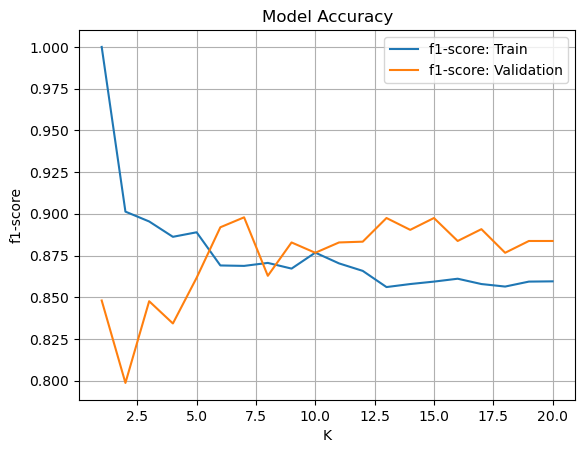

In [40]:
# KNN
trn_acc = []
val_acc = []
neighbours = range(1, 21)
for n in neighbours:
    clf_NN = KNeighborsClassifier(n_neighbors=n)
    clf_NN.fit(X_train, y_train)

    y_pred = clf_NN.predict(X_train)
    trn_acc.append(classification_report(y_train, y_pred, output_dict=True)['weighted avg']['f1-score'])

    y_pred = clf_NN.predict(X_val)
    val_acc.append(classification_report(y_val, y_pred, output_dict=True)['weighted avg']['f1-score'])

plt.title('Model Accuracy')
plt.plot(neighbours, trn_acc, label='f1-score: Train')
plt.plot(neighbours, val_acc, label='f1-score: Validation')
plt.legend(), plt.grid()
plt.xlabel('K'), plt.ylabel('f1-score')
plt.show()

It seems that K=7 leads to the best results.

In [41]:
# K =7
clf_NN = KNeighborsClassifier(n_neighbors=7)
clf_NN.fit(X_train, y_train)


y_pred = clf_NN.predict(X_val)
classification_report(y_val, y_pred, output_dict=True)['weighted avg']
report = classification_report(y_val, y_pred, output_dict=True)['weighted avg']
classifiers['K-NN'] = (report['precision'], report['recall'], report['f1-score'])

8.5. Gaussian Naive Bayes

In [42]:
# Gaussian Naive bayes
clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)


y_pred = clf_NB.predict(X_val)
report = classification_report(y_val, y_pred, output_dict=True)['weighted avg']
classifiers['Gaussian NB'] = (report['precision'], report['recall'], report['f1-score'])

## Step 9: Comparing the Models

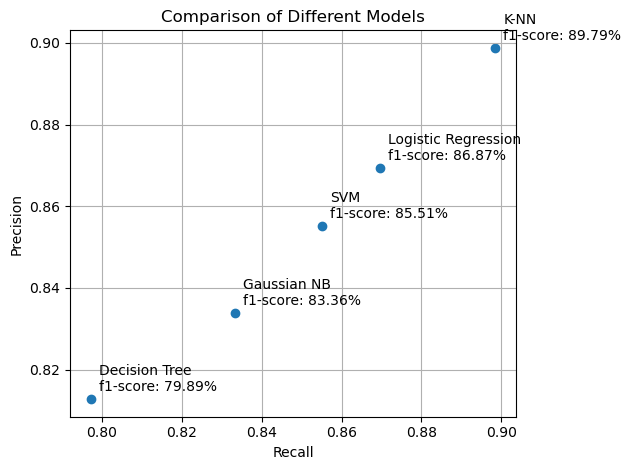

In [43]:
precision   = [classifiers[model][0] for model in classifiers.keys()]
recall      = [classifiers[model][1] for model in classifiers.keys()]
f1_score    = [classifiers[model][2] for model in classifiers.keys()]
annot        = [f'{clf}\nf1-score: {classifiers[clf][2]:.2%}' for clf in classifiers]

plt.title('Comparison of Different Models')
plt.scatter(recall, precision)

# Add label to data points
margin = 0.002
for (x, y, t) in zip(recall, precision, annot):
    plt.text(x + margin, y + margin, t)

plt.xlabel('Recall'), plt.ylabel('Precision')
plt.grid()

plt.tight_layout()
plt.savefig('PR Chart.jpg', dpi=300)
plt.show()

It seems that KNN classifier outperforms other models. So we use KNN model to make our final predictions on X_test

## Step 10: Evaluation & Confusion Matrix

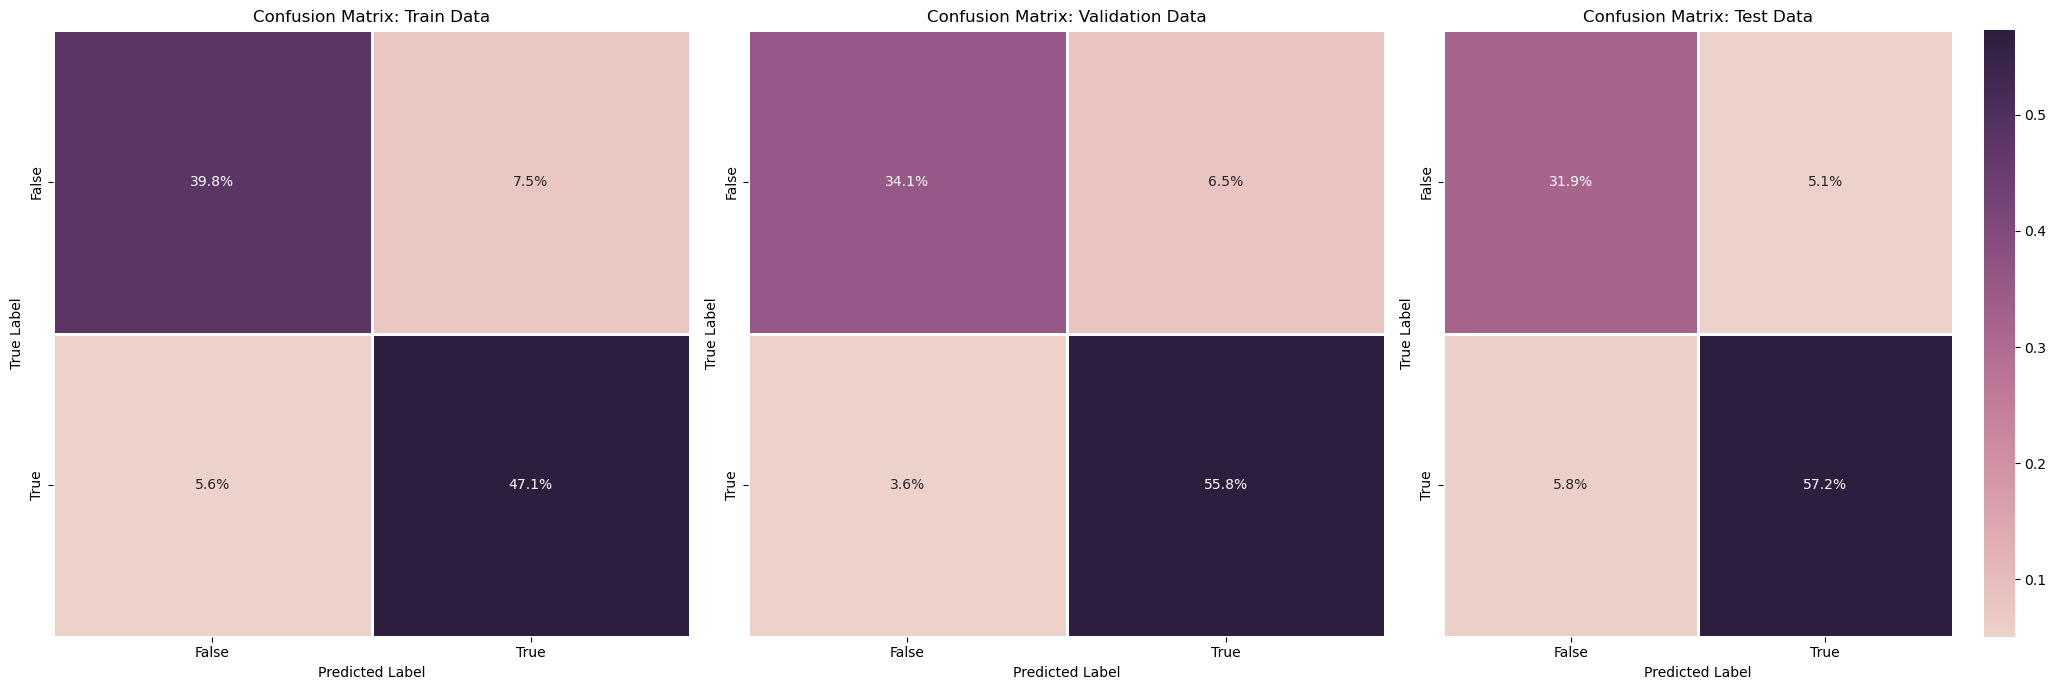

In [44]:
# Confusion Matrix
fig, axes = plt.subplots(1, 3, figsize=(21, 7))
palette = sns.cubehelix_palette(as_cmap=True)

plt.subplot(1, 3, 1)
plt.title('Confusion Matrix: Train Data')
y_pred = clf_NN.predict(X_train)
conf_mat = confusion_matrix(y_train, y_pred, normalize='all')
sns.heatmap(
    conf_mat,
    annot=True,
    fmt='.1%',
    cmap=palette,
    xticklabels=['False', 'True'], yticklabels=['False', 'True'],
    linewidths=2,
    linecolor='white',
    ax=axes[0],
    cbar=False,
)
plt.xlabel('Predicted Label'), plt.ylabel('True Label')


plt.subplot(1, 3, 2)
plt.title('Confusion Matrix: Validation Data')
y_pred = clf_NN.predict(X_val)
conf_mat = confusion_matrix(y_val, y_pred, normalize='all')
sns.heatmap(
    conf_mat,
    annot=True,
    fmt='.1%',
    cmap=palette,
    xticklabels=['False', 'True'], yticklabels=['False', 'True'],
    linewidths=2,
    linecolor='white',
    ax=axes[1],
    cbar=False,
)
plt.xlabel('Predicted Label'), plt.ylabel('True Label')


plt.subplot(1, 3, 3)
plt.title('Confusion Matrix: Test Data')
y_pred = clf_NN.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred, normalize='all')
sns.heatmap(
    conf_mat,
    annot=True,
    fmt='.1%',
    cmap=palette,
    xticklabels=['False', 'True'], yticklabels=['False', 'True'],
    linewidths=2,
    linecolor='white',
    ax=axes[2],
    cbar=True,
)
plt.xlabel('Predicted Label'), plt.ylabel('True Label')

plt.tight_layout()
plt.savefig('Confusion Matrix.jpg', dpi=300)
plt.show()

## Step 11: Final Predictions

In [45]:
# Final prediction
y_pred = clf_NN.predict(X_test)
classification_report(y_test, y_pred, output_dict=True)['weighted avg']

{'precision': 0.8918293536594851,
 'recall': 0.8913043478260869,
 'f1-score': 0.8915178473393081,
 'support': 138}

The model has great performance on test data and achieved 89.15% f1-score

Accuracy Score

In [46]:
model = KNeighborsClassifier()

In [47]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [48]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [49]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8892355694227769


In [50]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [51]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.8985507246376812


# Building a Predictive System

In [52]:
input_data = (37,0,2,140,207,0,0,130,1,1.5,1)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease
